In [1]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

datasource = pq.read_table("escooter_history.parquet")

dataset = datasource.to_pandas()
print(dataset)

                   datetime  holiday  workingday            weather   temp  \
0       2019-01-01 00:00:09        0           0  clear, few clouds   9.84   
1       2019-01-01 00:00:41        0           0  clear, few clouds   9.84   
2       2019-01-01 00:01:20        0           0  clear, few clouds   9.84   
3       2019-01-01 00:04:12        0           0  clear, few clouds   9.84   
4       2019-01-01 00:15:19        0           0  clear, few clouds   9.84   
...                     ...      ...         ...                ...    ...   
3296016 2020-12-31 23:55:56        0           1  clear, few clouds  10.66   
3296017 2020-12-31 23:55:59        0           1  clear, few clouds  10.66   
3296018 2020-12-31 23:57:17        0           1  clear, few clouds  10.66   
3296019 2020-12-31 23:57:28        0           1  clear, few clouds  10.66   
3296020 2020-12-31 23:58:10        0           1  clear, few clouds  10.66   

          atemp  humidity  windspeed  registered_customer  
0  

In [4]:
dataset.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,registered_customer
count,3.296021e+06,3.296021e+06,3.296021e+06,3.296021e+06,3.296021e+06,3.296021e+06,3296021
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,2679174
mean,2.708539e-02,6.914516e-01,2.330069e+01,2.694455e+01,5.667220e+01,1.344274e+01,NaN
std,1.623323e-01,4.618943e-01,7.417160e+00,7.960401e+00,1.825513e+01,8.042864e+00,NaN
min,0.000000e+00,0.000000e+00,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,0.000000e+00,0.000000e+00,1.722000e+01,2.121000e+01,4.200000e+01,7.001500e+00,NaN
50%,0.000000e+00,1.000000e+00,2.460000e+01,2.803000e+01,5.500000e+01,1.299800e+01,NaN
75%,0.000000e+00,1.000000e+00,2.952000e+01,3.257500e+01,7.000000e+01,1.900120e+01,NaN



# Werte liegen nicht atomar vor, weitere aufsplittung nicht möglich

In [3]:
newcols = pd.get_dummies(dataset["weather"])
print(newcols)

         clear, few clouds  cloudy, mist  \
0                        1             0   
1                        1             0   
2                        1             0   
3                        1             0   
4                        1             0   
...                    ...           ...   
3296016                  1             0   
3296017                  1             0   
3296018                  1             0   
3296019                  1             0   
3296020                  1             0   

         heacy rain or thunderstorm or snow or ice pallets  \
0                                                        0   
1                                                        0   
2                                                        0   
3                                                        0   
4                                                        0   
...                                                    ...   
3296016                              

In [4]:
dataset = dataset.drop(columns=['weather'])
print(dataset)

                   datetime  holiday  workingday   temp   atemp  humidity  \
0       2019-01-01 00:00:09        0           0   9.84  14.395        81   
1       2019-01-01 00:00:41        0           0   9.84  14.395        81   
2       2019-01-01 00:01:20        0           0   9.84  14.395        81   
3       2019-01-01 00:04:12        0           0   9.84  14.395        81   
4       2019-01-01 00:15:19        0           0   9.84  14.395        81   
...                     ...      ...         ...    ...     ...       ...   
3296016 2020-12-31 23:55:56        0           1  10.66  13.635        65   
3296017 2020-12-31 23:55:59        0           1  10.66  13.635        65   
3296018 2020-12-31 23:57:17        0           1  10.66  13.635        65   
3296019 2020-12-31 23:57:28        0           1  10.66  13.635        65   
3296020 2020-12-31 23:58:10        0           1  10.66  13.635        65   

         windspeed  registered_customer  
0           0.0000               

In [5]:
dataset = dataset.join(newcols)
print(dataset)

                   datetime  holiday  workingday   temp   atemp  humidity  \
0       2019-01-01 00:00:09        0           0   9.84  14.395        81   
1       2019-01-01 00:00:41        0           0   9.84  14.395        81   
2       2019-01-01 00:01:20        0           0   9.84  14.395        81   
3       2019-01-01 00:04:12        0           0   9.84  14.395        81   
4       2019-01-01 00:15:19        0           0   9.84  14.395        81   
...                     ...      ...         ...    ...     ...       ...   
3296016 2020-12-31 23:55:56        0           1  10.66  13.635        65   
3296017 2020-12-31 23:55:59        0           1  10.66  13.635        65   
3296018 2020-12-31 23:57:17        0           1  10.66  13.635        65   
3296019 2020-12-31 23:57:28        0           1  10.66  13.635        65   
3296020 2020-12-31 23:58:10        0           1  10.66  13.635        65   

         windspeed  registered_customer  clear, few clouds  cloudy, mist  \

In [6]:
dataset = dataset.rename(columns={'heacy rain or thunderstorm or snow or ice pallets' : 'Heavy Precipitation', 'light snow or rain or thunderstorm': 'Light Precipitation'})

In [7]:
dataset.dtypes
dataset[['holiday', 'workingday' ]] = dataset[['holiday', 'workingday']].replace({0:False, 1:True})

In [8]:
dataset.dtypes

datetime               datetime64[ns]
holiday                          bool
workingday                       bool
temp                          float64
atemp                         float64
humidity                        int64
windspeed                     float64
registered_customer           boolean
clear, few clouds               uint8
cloudy, mist                    uint8
Heavy Precipitation             uint8
Light Precipitation             uint8
dtype: object

In [9]:
subset = dataset.loc[dataset["humidity"] == 0]
#Replace 0 values with average humidity

In [10]:
dataset['Dates'] = pd.to_datetime(dataset['datetime']).dt.date
dataset['Time'] = pd.to_datetime(dataset['datetime']).dt.time

dataset['Weekday'] = pd.to_datetime(dataset['datetime']).dt.day_name()
   


# Comparison between Weekdays

<AxesSubplot:xlabel='Weekday', ylabel='Rent Count'>

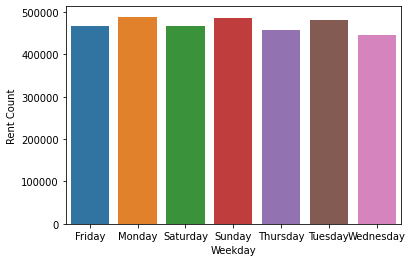

In [11]:
weekdayset = dataset.groupby(["Weekday"]).size().to_frame("Rent Count")
weekdayset
sns.barplot(data=weekdayset, x=weekdayset.index, y="Rent Count")

# Montag, Verleih nach Zeiten

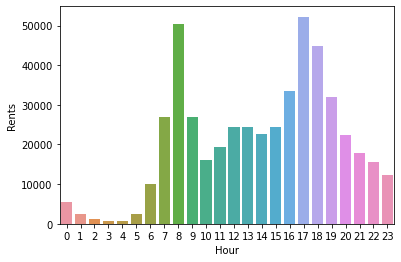

In [12]:
mondayset = dataset.loc[dataset["Weekday"]=="Monday"]
mondayhour = mondayset.groupby(mondayset.datetime.dt.hour).size().to_frame("Rents per Hour")
monfig = sns.barplot(data=mondayhour, x=mondayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(monfig)

# Dienstag, Verleih nach Zeiten

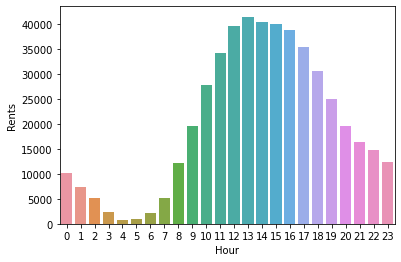

In [13]:
tuesdayset = dataset.loc[dataset["Weekday"]=="Tuesday"]
tuesdayhour = tuesdayset.groupby(tuesdayset.datetime.dt.hour).size().to_frame("Rents per Hour")
tuesfig = sns.barplot(data=tuesdayhour, x=tuesdayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(tuesfig)

# Mittwoch, Verleih nach Zeiten

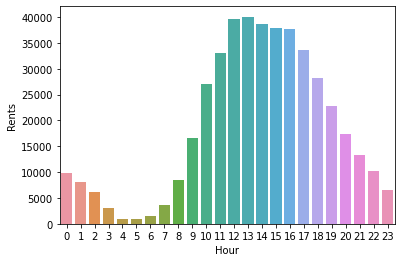

In [14]:
wednesdayset = dataset.loc[dataset["Weekday"]=="Wednesday"]
wednesdayhour = wednesdayset.groupby(wednesdayset.datetime.dt.hour).size().to_frame("Rents per Hour")
wedfig = sns.barplot(data=wednesdayhour, x=wednesdayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(wedfig)

# Donnerstag, Verleih nach Zeiten

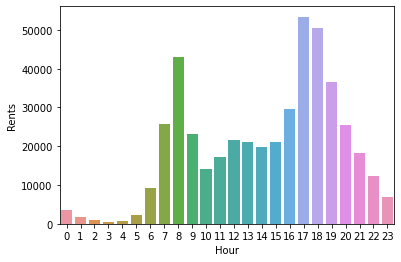

In [15]:
thursdayset = dataset.loc[dataset["Weekday"]=="Thursday"]
thursdayhour = thursdayset.groupby(thursdayset.datetime.dt.hour).size().to_frame("Rents per Hour")
thursfig = sns.barplot(data=thursdayhour, x=thursdayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(thursfig)

# Freitag, Verleih nach Zeiten

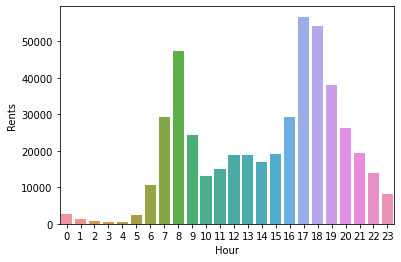

In [16]:
fridayset = dataset.loc[dataset["Weekday"]=="Friday"]
fridayhour = fridayset.groupby(fridayset.datetime.dt.hour).size().to_frame("Rents per Hour")
fridfig = sns.barplot(data=fridayhour, x=fridayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(fridfig)

# Samstag, Verleih nach Zeiten

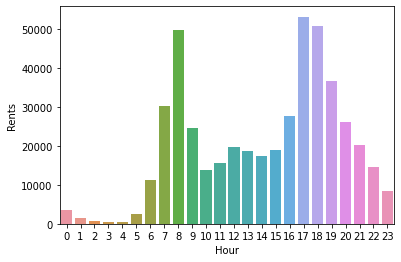

In [17]:
saturdayset = dataset.loc[dataset["Weekday"]=="Saturday"]
saturdayhour = saturdayset.groupby(saturdayset.datetime.dt.hour).size().to_frame("Rents per Hour")
satfig = sns.barplot(data=saturdayhour, x=saturdayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(satfig)


# Sonntag, Verleih nach Zeiten

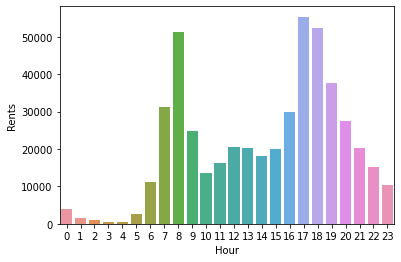

In [18]:
sundayset = dataset.loc[dataset["Weekday"]=="Sunday"]
sundayhour = sundayset.groupby(sundayset.datetime.dt.hour).size().to_frame("Rents per Hour")
sunfig = sns.barplot(data=sundayhour, x=sundayhour.index, y="Rents per Hour")
plt.xlabel("Hour")
plt.ylabel("Rents")
plt.show(sunfig)

# Ausleihen nach Zeit

In [7]:
groupedbymonth = dataset.groupby(dataset.datetime.dt.month)
groupedbymonth.describe()

holiday                                                          \
             count unique top freq      mean       std  min  25%  50%  75%   
datetime                                                                     
1         129354.0    NaN NaN  NaN  0.040579  0.197313  0.0  0.0  0.0  0.0   
2         148696.0    NaN NaN  NaN  0.027634  0.163921  0.0  0.0  0.0  0.0   
3         223194.0    NaN NaN  NaN  0.000000  0.000000  0.0  0.0  0.0  0.0   
4         261944.0    NaN NaN  NaN  0.036252  0.186917  0.0  0.0  0.0  0.0   
5         331309.0    NaN NaN  NaN  0.034602  0.182770  0.0  0.0  0.0  0.0   
6         347616.0    NaN NaN  NaN  0.000000  0.000000  0.0  0.0  0.0  0.0   
7         340534.0    NaN NaN  NaN  0.039485  0.194746  0.0  0.0  0.0  0.0   
8         345209.0    NaN NaN  NaN  0.000000  0.000000  0.0  0.0  0.0  0.0   
9         335189.0    NaN NaN  NaN  0.027999  0.164970  0.0  0.0  0.0  0.0   
10        322490.0    NaN NaN  NaN  0.032854  0.178254  0.0  0.0  0.0  0.0   
11        272282.0    NaN NaN  NaN  0.067720  0.251266  0.0  0.0  0.0  0.0   
12        238204.0    NaN NaN  NaN  0.029769  0.169949  0.0  0.0  0.0  0.0   

          ... registered_customer                                              \
          ...              unique   top    freq mean  std  min  25%  50%  75%   
datetime  ...                                                                   
1         ...                   2  True  117435  NaN  NaN  NaN  NaN  NaN  NaN   
2         ...                   2  True  133639  NaN  NaN  NaN  NaN  NaN  NaN   
3         ...                   2  True  181872  NaN  NaN  NaN  NaN  NaN  NaN   
4         ...                   2  True  200599  NaN  NaN  NaN  NaN  NaN  NaN   
5         ...                   2  True  260105  NaN  NaN  NaN  NaN  NaN  NaN   
6         ...                   2  True  271977  NaN  NaN  NaN  NaN  NaN  NaN   
7         ...                   2  True  262002  NaN  NaN  NaN  NaN  NaN  NaN   
8         ...                   2  True  273448  NaN  NaN  NaN  NaN  NaN  NaN   
9         ...                   2  True  264146  NaN  NaN  NaN  NaN  NaN  NaN   
10        ...                   2  True  264056  NaN  NaN  NaN  NaN  NaN  NaN   
11        ...                   2  True  234865  NaN  NaN  NaN  NaN  NaN  NaN   
12        ...                   2  True  215030  NaN  NaN  NaN  NaN  NaN  NaN   

               
          max  
datetime       
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  
10        NaN  
11        NaN  
12        NaN  

[12 rows x 77 columns]